In [1]:
import matplotlib.pyplot as plt 
import pandas as pd
file_path = 'car_evaluation.csv'
car_data = pd.read_csv(file_path)

In [2]:
print(f"Dimensions du dataset : {car_data.shape}")

Dimensions du dataset : (1727, 7)


In [4]:
print("Exemple de données avant le renommage des colonnes:")
print(car_data.head())

Exemple de données avant le renommage des colonnes:
   vhigh vhigh.1  2 2.1  small   low  unacc
0  vhigh   vhigh  2   2  small   med  unacc
1  vhigh   vhigh  2   2  small  high  unacc
2  vhigh   vhigh  2   2    med   low  unacc
3  vhigh   vhigh  2   2    med   med  unacc
4  vhigh   vhigh  2   2    med  high  unacc


In [5]:
car_data.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
print("Exemple de données après le renommage des colonnes:")
print(car_data.head())

Exemple de données après le renommage des colonnes:
  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    med  unacc
1  vhigh  vhigh     2       2    small   high  unacc
2  vhigh  vhigh     2       2      med    low  unacc
3  vhigh  vhigh     2       2      med    med  unacc
4  vhigh  vhigh     2       2      med   high  unacc


In [6]:
print(car_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB
None


In [7]:
X = car_data.drop(columns=['class'])
y = car_data['class']
print(f"Dimensions de X : {X.shape}")
print(f"Dimensions de y : {y.shape}")

Dimensions de X : (1727, 6)
Dimensions de y : (1727,)


In [8]:
from sklearn.model_selection import train_test_split
# Diviser les données en ensemble de formation et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# Afficher les dimensions des ensembles de formation et de test
print(f"Dimensions de X_train : {X_train.shape}")
print(f"Dimensions de X_test : {X_test.shape}")
print(f"Dimensions de y_train : {y_train.shape}")
print(f"Dimensions de y_test : {y_test.shape}")


Dimensions de X_train : (1157, 6)
Dimensions de X_test : (570, 6)
Dimensions de y_train : (1157,)
Dimensions de y_test : (570,)


In [10]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_test_encoded = encoder.transform(X_test)

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
clf_gini = DecisionTreeClassifier(criterion='gini')
clf_gini.fit(X_train_encoded, y_train)
clf_entropy = DecisionTreeClassifier(criterion='entropy')
clf_entropy.fit(X_train_encoded, y_train)
y_pred_gini = clf_gini.predict(X_test_encoded)
print("Rapport de classification pour le modèle avec critère de Gini:")
print(classification_report(y_test, y_pred_gini))
y_pred_entropy = clf_entropy.predict(X_test_encoded)
print("Rapport de classification pour le modèle avec critère d'entropie:")
print(classification_report(y_test, y_pred_entropy))

Rapport de classification pour le modèle avec critère de Gini:
              precision    recall  f1-score   support

         acc       0.98      0.95      0.96       127
        good       0.79      0.83      0.81        18
       unacc       0.99      1.00      1.00       399
       vgood       0.92      0.88      0.90        26

    accuracy                           0.98       570
   macro avg       0.92      0.92      0.92       570
weighted avg       0.98      0.98      0.98       570

Rapport de classification pour le modèle avec critère d'entropie:
              precision    recall  f1-score   support

         acc       0.98      0.95      0.96       127
        good       0.79      0.83      0.81        18
       unacc       0.99      1.00      1.00       399
       vgood       0.92      0.88      0.90        26

    accuracy                           0.98       570
   macro avg       0.92      0.92      0.92       570
weighted avg       0.98      0.98      0.98       570



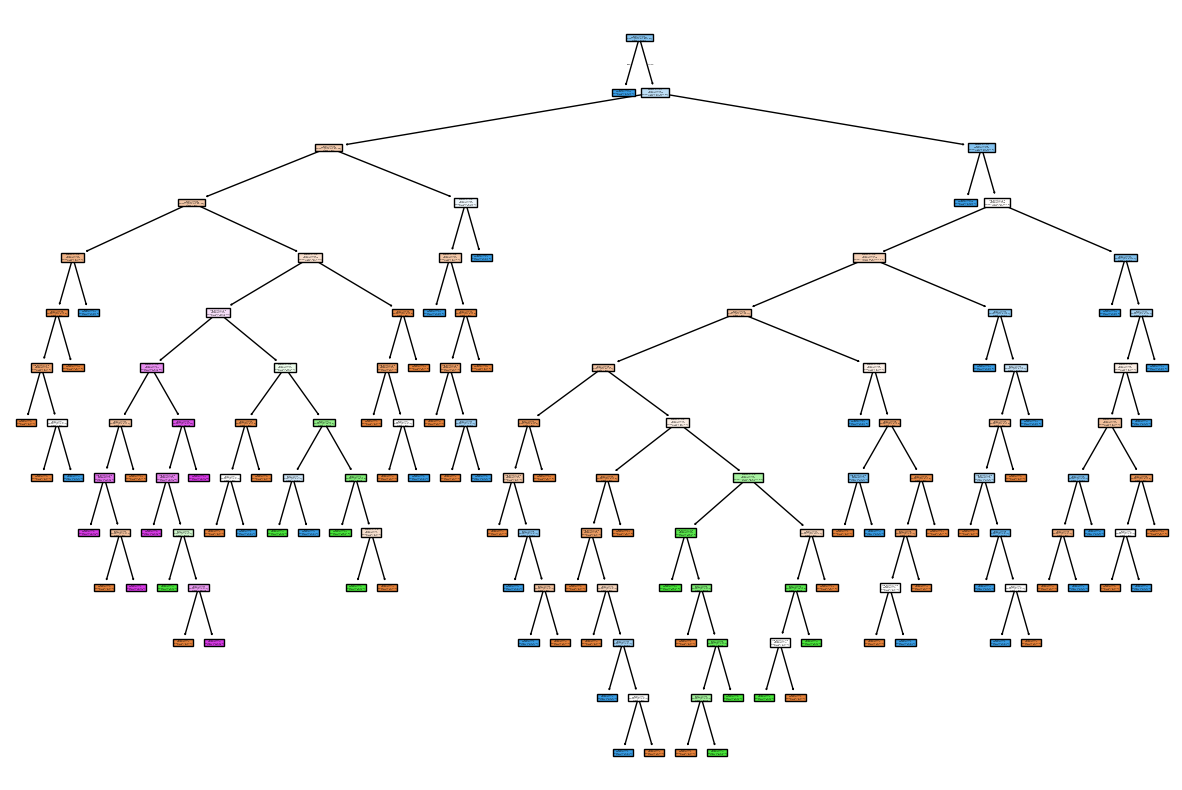

In [12]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15, 10))
plot_tree(clf_gini, feature_names=X.columns, class_names=clf_gini.classes_, filled=True)
plt.show()